# Iris 데이터와 KNN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

## 1. Data

### 1.1 Data Load

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

data = iris.data
target = iris.target

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# target이 0인 값과 0이 아닌 값으로 나누어 2개의 카테코기로 분류를 하도록 함

target != 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
data.shape

(150, 4)

In [ ]:
data = data[target != 0, 2:]
target = target[target != 0]

In [ ]:
data.shape

(100, 2)

In [ ]:
data = pd.DataFrame(data)
target = pd.DataFrame(target)

In [ ]:
data.loc[data.duplicated()]   # 중복된 값이 여러개라면 중복된 값 중 하나만 남아있도록 하는 것이 data.duplicated

0    1
13  4.7  1.4
16  4.5  1.5
18  4.5  1.5
21  4.0  1.3
22  4.9  1.5
25  4.4  1.4
28  4.5  1.5
29  3.5  1.0
34  4.5  1.5
39  4.0  1.3
43  3.3  1.0
46  4.2  1.3
47  4.3  1.3
49  4.1  1.3
76  4.8  1.8
77  4.9  1.8
87  5.5  1.8
88  4.8  1.8
90  5.6  2.4
92  5.1  1.9

In [ ]:
~data.duplicated()

0     True
1     True
2     True
3     True
4     True
      ... 
95    True
96    True
97    True
98    True
99    True
Length: 100, dtype: bool

In [ ]:
target = target.loc[~data.duplicated()].values.flatten()    # 데이터 중복 확인 (~data.duplicated()는 중복되지 않은 데이터만 남겨둔다는 뜻)
data = data.loc[~data.duplicated()].values

In [ ]:
data.shape

(80, 2)

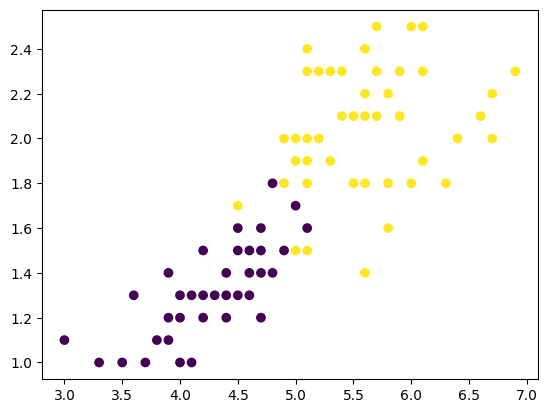

In [ ]:
plt.scatter(data[:, 0], data[:, 1], c=target)

### 1.2 시각화 데이터

In [ ]:
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

## 2. k값에 따른 결정 경계

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k값에 따른 KNN의 결정 경계 그려보기
k가 작을 수록 overfitting이, k가 클수록 underfitting이 일어남

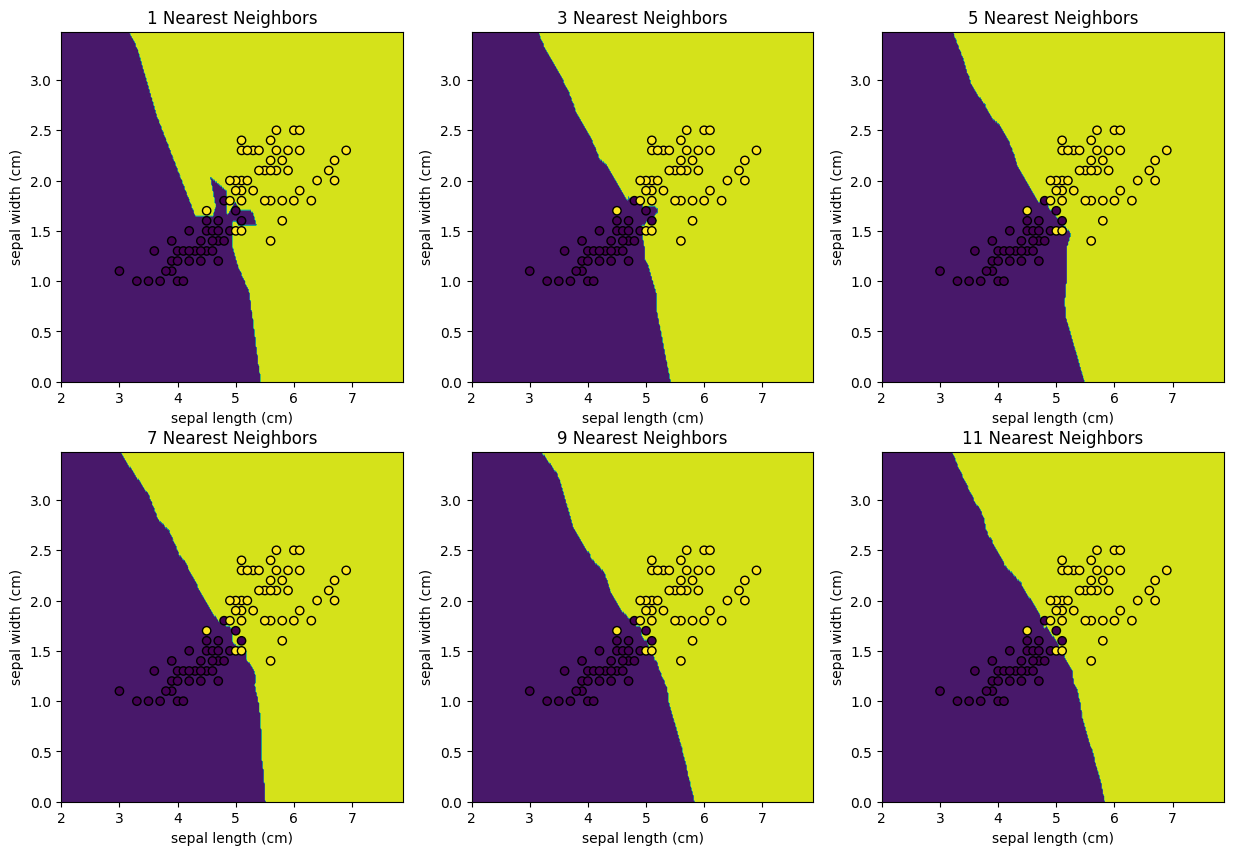

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for idx, n in enumerate(range(1, 12, 2)):
  # knn 생성 및 학습
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(data, target)

  # 시각회 데이터 예측
  Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  ax = axes[idx//3, idx%3]

  # 영역 표시
  ax.contourf(xx, yy, Z)

  # 데이터 표시
  ax.scatter(data[:, 0], data[:, 1], c=target, alpha=1.0, edgecolor="black")

  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xlabel(iris.feature_names[0])
  ax.set_ylabel(iris.feature_names[1])
  ax.set_title(f"{n} Nearest Neighbors")

## 3. 나의 가장 가까운 이웃은?

KNN의 거리의 종류는 P를 통해서 바꿀 수 있음
- p = 1
    - 맨해튼 거리
- p = 2
    - 유클리드 거리

### 3.1 Euclidean Distance

In [46]:
train_data, train_target = data[:-1], target[:-1]
test_data = data[-1:]

In [47]:
len(train_data), len(test_data)

(79, 1)

In [48]:
euclid_knn = KNeighborsClassifier(n_neighbors=10)
euclid_knn.fit(train_data, train_target)

KNeighborsClassifier(n_neighbors=10)

In [53]:
# test data에 대해 가장 가까운 상위 10개의 데이터까지의 거리와 idx 반환 (가장 가까운 상위 n_neighbors개 구함)
euclid_knn.kneighbors(test_data, n_neighbors=10, return_distance=True)

(array([[0.1       , 0.14142136, 0.14142136, 0.2       , 0.2       ,
         0.2       , 0.2236068 , 0.2236068 , 0.2236068 , 0.28284271]]),
 array([[37, 76, 21, 59, 46, 25, 49, 47, 77, 57]]))

In [57]:
# 데이터를 넣었을 때 실제로 가까웠던 데이터의 Idx 구하기
euclid_neighbors_idx = euclid_knn.kneighbors(test_data, n_neighbors=10, return_distance=False).ravel()    # ravel()은 불퓰요한 shape을 없애줌
euclid_neighbors = train_data[euclid_neighbors_idx]
euclid_neighbors_label = train_target[euclid_neighbors_idx]

In [55]:
euclid_neighbors

array([[5.1, 1.9],
       [5. , 1.9],
       [5. , 1.7],
       [4.9, 1.8],
       [5.1, 2. ],
       [5.1, 1.6],
       [5. , 2. ],
       [5.3, 1.9],
       [5.2, 2. ],
       [4.9, 2. ]])

In [60]:
# label이 2인 값이 훨씬 많으므로 2로 분류될 것이라고 예상할 수 있음
euclid_neighbors_label

array([2, 2, 1, 2, 2, 1, 2, 2, 2, 2])

In [ ]:
# 예측 결과 2
euclid_knn.predict(test_data)

In [63]:
# 클래스에 속할 확률
euclid_knn.predict_proba(test_data)

array([[0.2, 0.8]])

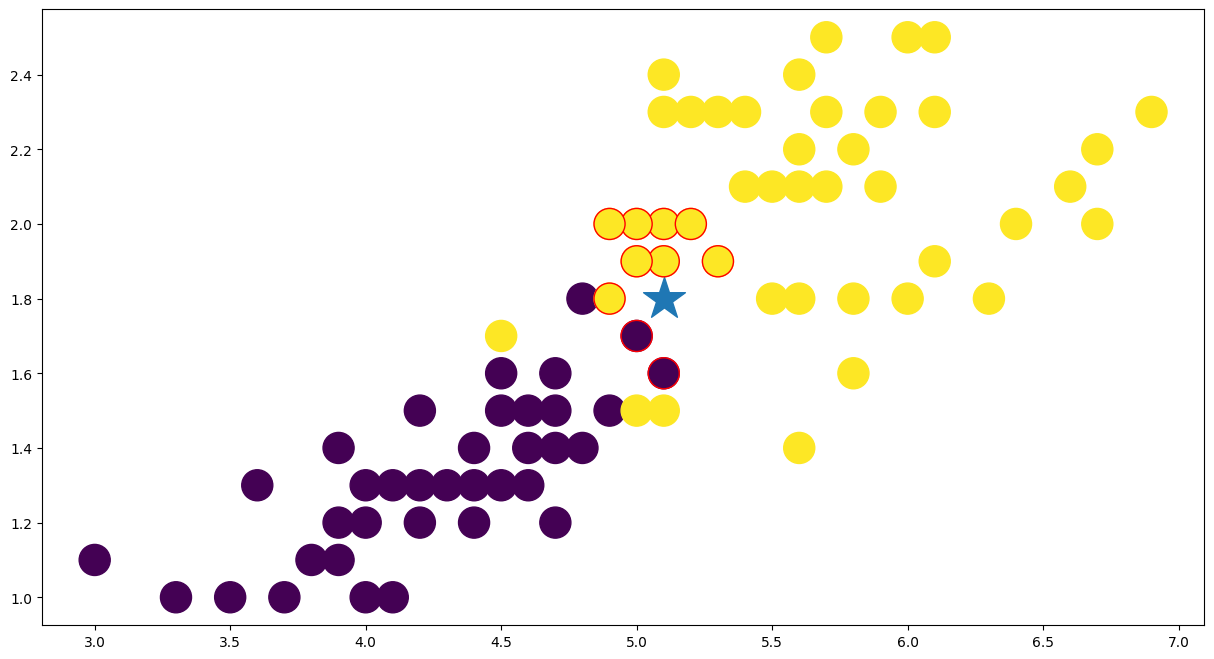

In [66]:
plt.figure(figsize=(15, 8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_target, s=500)
plt.scatter(test_data[0, 0], test_data[0, 1], marker="*", s=1000)           # 별 모양이 테스트 데이터
plt.scatter(euclid_neighbors[:, 0], euclid_neighbors[:, 1], c=euclid_neighbors_label, edgecolors="red", s=500)    # 테스트 데이터에 가까운 상위 10개 데이터 빨간 테두리로 표시

### 3.2 Manhattan Distance

In [67]:
manhattan_knn = KNeighborsClassifier(n_neighbors=10, p=1)
manhattan_knn.fit(train_data, train_target)

KNeighborsClassifier(n_neighbors=10, p=1)

In [68]:
manhattan_neighbors_idx = manhattan_knn.kneighbors(test_data, n_neighbors=10, return_distance=False).ravel()
manhattan_neighbors = train_data[manhattan_neighbors_idx]
manhattan_neighbors_label = train_target[manhattan_neighbors_idx]

In [69]:
manhattan_neighbors

array([[5.1, 1.9],
       [4.9, 1.8],
       [5. , 1.9],
       [5. , 1.7],
       [5.1, 2. ],
       [5.1, 1.6],
       [5. , 2. ],
       [4.8, 1.8],
       [5.3, 1.9],
       [5.1, 1.5]])

In [70]:
manhattan_neighbors_label

array([2, 2, 2, 1, 2, 1, 2, 1, 2, 2])

In [72]:
# euclidean 사용했을 때보다 1로 분류될 확률이 0.2 -> 0.3 으로 증가
manhattan_knn.predict_proba(test_data)

array([[0.3, 0.7]])

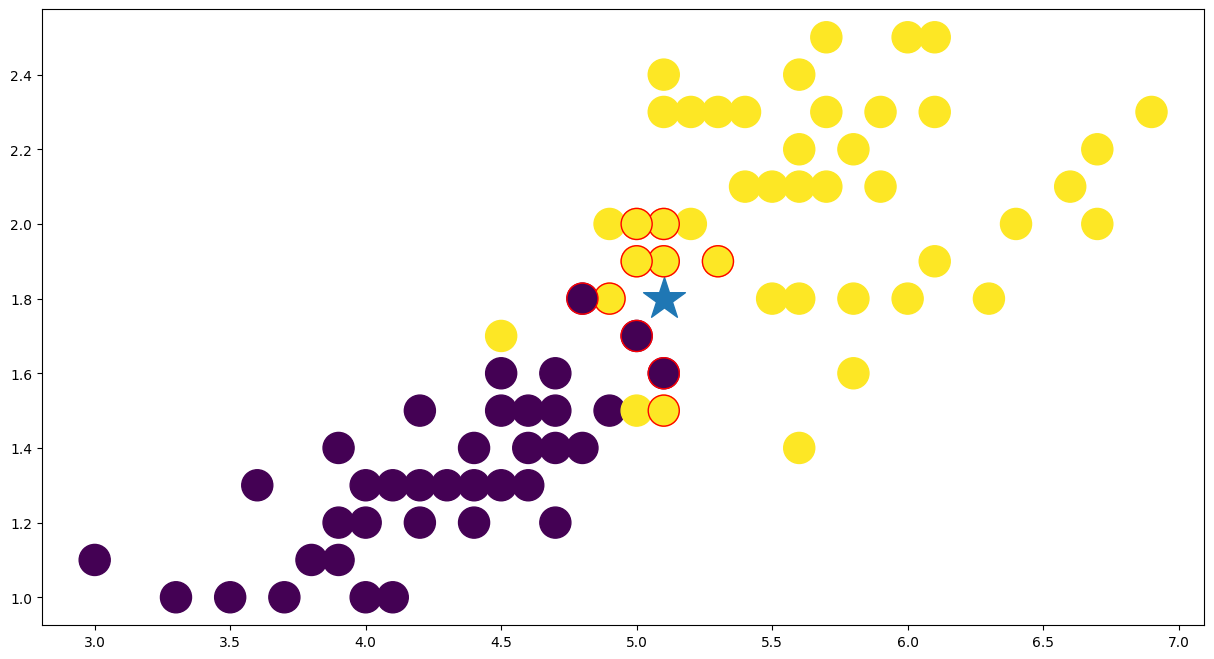

In [73]:
plt.figure(figsize=(15, 8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_target, s=500)
plt.scatter(test_data[0, 0], test_data[0, 1], marker="*", s=1000)
plt.scatter(manhattan_neighbors[:, 0], manhattan_neighbors[:, 1], c=manhattan_neighbors_label, edgecolors="red", s=500)

### 3.3 비교

In [74]:
euclid_neighbors_idx

array([37, 76, 21, 59, 46, 25, 49, 47, 77, 57])

In [75]:
manhattan_neighbors_idx

array([37, 59, 76, 21, 46, 25, 49, 17, 47, 67])

In [77]:
# 두 거리 계산법에 따른 상위 10개 근접 데이터 idx 비교
set(euclid_neighbors_idx) - set(manhattan_neighbors_idx)

{57, 77}

In [78]:
set(manhattan_neighbors_idx) - set(euclid_neighbors_idx)

{17, 67}

In [80]:
diff_neighbors_idx = list(set(euclid_neighbors_idx) - set(manhattan_neighbors_idx))
diff_neighbors_idx.extend(list(set(manhattan_neighbors_idx) - set(euclid_neighbors_idx)))
diff_neighbors_idx

[57, 77, 17, 67]

In [81]:
diff_neighbors = train_data[diff_neighbors_idx]
diff_neighbors_label = train_target[diff_neighbors_idx]

In [82]:
same_neighbors_idx = list(set(euclid_neighbors_idx) & set(manhattan_neighbors_idx))
same_neighbors_idx

[37, 76, 46, 47, 49, 21, 25, 59]

In [83]:
same_neighbors = train_data[same_neighbors_idx]
same_neighbors_label = train_target[same_neighbors_idx]

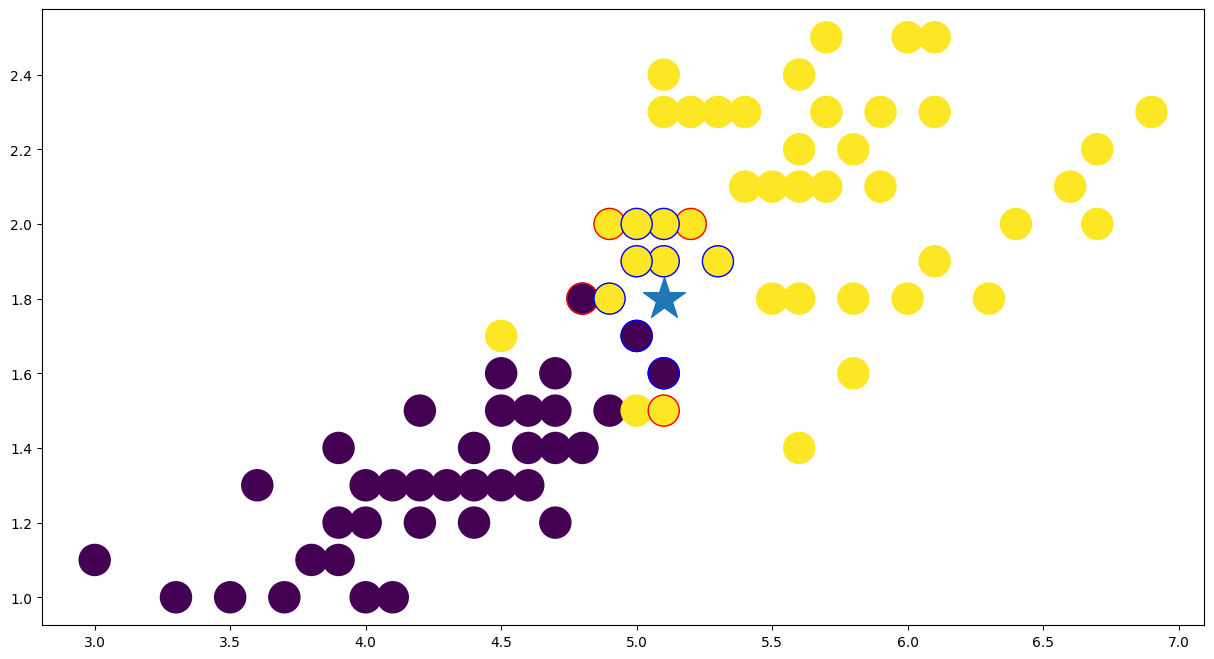

In [87]:
plt.figure(figsize=(15, 8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_target, s=500)
plt.scatter(test_data[0, 0], test_data[0, 1], marker="*", s=1000)
plt.scatter(diff_neighbors[:, 0], diff_neighbors[:, 1], c=diff_neighbors_label, edgecolors="red", s=500)
plt.scatter(same_neighbors[:, 0], same_neighbors[:, 1], c=same_neighbors_label, edgecolors="blue", s=500)